## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
#%tensorflow_version 2.x

In [2]:
import tensorflow as tf
import keras

tf.__version__

Using TensorFlow backend.


'1.15.0'

In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [0]:
tf.set_random_seed(42)


In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [6]:
print('Samples for train set:{} test set:{}'.format(x_train.shape[0], x_test.shape[0]))

Samples for train set:60000 test set:10000


### Find dimensions of an image in the dataset

In [7]:
print('Dimensions for train set:{} {}'.format(x_train.shape, y_train.shape))
print('Dimensions for test set:{} {}'.format(x_test.shape, y_test.shape))

Dimensions for train set:(60000, 28, 28) (60000,)
Dimensions for test set:(10000, 28, 28) (10000,)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [8]:
print('Unique Labels for train data-sets are:',np.unique(y_train))
print('Unique Labels for test data-sets are:',np.unique(y_test))

Unique Labels for train data-sets are: [0 1 2 3 4 5 6 7 8 9]
Unique Labels for test data-sets are: [0 1 2 3 4 5 6 7 8 9]


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [10]:
print(y_test.shape)
print('First 5 examples now are: ', y_test[0:5])

(10000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')/ 255
x_test = x_test.astype('float32') / 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [12]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_test.shape

(10000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.callbacks import EarlyStopping


### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [14]:
input_shape = (28,28,1)
num_classes = 10

# Build the model
model = Sequential() 

# add a conv layer 
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))

#convert the conv o/p to vector
model.add(Flatten())

# add a dense layer
model.add(Dense(128, activation='relu')) 
model.add(Dense(num_classes, activation='softmax'))

In [15]:
# compile the model for the given configuraitons
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Fit the model
early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping] 

model.fit(x_train, y_train, validation_split= 0.2,  epochs=10, callbacks=callback_list)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("\n Test Accuracy: %.2f%%" % (scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





48000/48000 [==============================] - 11s 227us/step - loss: 0.3932 - acc: 0.8594 - val_loss: 0.3021 - val_acc: 0.8883
Epoch 2/10
48000/48000 [==============================] - 8s 174us/step - loss: 0.2469 - acc: 0.9100 - val_loss: 0.2504 - val_acc: 0.9085
Epoch 3/10
48000/48000 [==============================] - 8s 174us/step - loss: 0.1815 - acc: 0.9318 - val_loss: 0.2492 - val_acc: 0.9120
Epoch 4/10
48000/48000 [==============================] - 8s 174us/step - loss: 0.1324 - acc: 0.9505 - val_loss: 0.2596 - val_acc: 0.9158
Epoch 5/10
48000/48000 [==============================] - 8s 174us/step - loss: 0.0911 - acc: 0.9660 - val_loss: 0.2785 - val_acc: 0.9142
Epoch 6/10
48000/48000 [==============================] - 8s 174us/step - loss: 0.0606 - acc: 0.9777 - val_loss: 0.3343 - val_acc: 0.9134
Epoch 7/10
48000/48

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [17]:
input_shape = (28,28,1)
num_classes = 10

#Build the model
model = Sequential()

# add a conv layer
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(Dropout(0.25))

# add pool layer
model.add(MaxPooling2D(pool_size=(2,2) ))

# convert o/p of conv layer to vector for dense layer processing
model.add(Flatten())

# add a dense layer
model.add(Dense(128, activation='relu')) 
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

# Fit the model
early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping] 

model.fit(x_train, y_train, validation_split= 0.2,  epochs=10, callbacks=callback_list)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("\n Test Accuracy: %.2f%%" % (scores[1]*100))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
___

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# Create object to transform data
'''
datagen = ImageDataGenerator(
                    featurewise_center=True,
                    featurewise_std_normalization=True,
                    rotation_range=20,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True)

'''
datagen = ImageDataGenerator(rotation_range=15,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

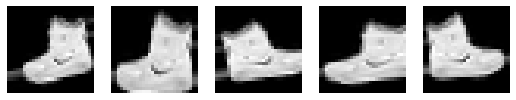

In [20]:
plt.figure(figsize=(9,9))
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [21]:
x_train.shape

(60000, 28, 28, 1)

In [22]:
model.fit_generator( datagen.flow(x_train, y_train),validation_data=(x_test,y_test), epochs=10)
#model.fit_generator( datagen.flow(x_train, y_train),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5729 - acc: 0.7862 - val_loss: 0.2950 - val_acc: 0.8913
Epoch 2/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.4416 - acc: 0.8346 - val_loss: 0.2794 - val_acc: 0.8973
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4017 - acc: 0.8499 - val_loss: 0.3210 - val_acc: 0.8820
Epoch 4/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3764 - acc: 0.8598 - val_loss: 0.2713 - val_acc: 0.9044
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3659 - acc: 0.8621 - val_loss: 0.2936 - val_acc: 0.8947
Epoch 6/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3511 - acc: 0.8685 - val_loss: 0.3027 - val_acc: 0.8941
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3433 - acc: 0.8718 - val_loss: 0.2848 - val_acc: 0.8995
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [31]:
# Final evaluation of the model
#scores = model.evaluate(x_test, y_test, verbose=0)
#print("\n Test Accuracy: %.2f%%" % (scores[1]*100))
print('Train accuracy is 87.8% and test accuracy is 89.6%')

Train accuracy is 87.8% and test accuracy is 89.6%


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
# Already loaded for the above example, hence not loading it again.

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

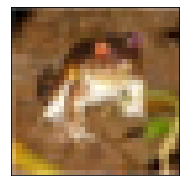

In [42]:
plt.figure(figsize=(18,18))
for i in range(0,1):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i])

In [26]:
from keras.utils import np_utils

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0

print('train labels',np.unique(y_train))
print('test labels',np.unique(y_test))

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


train labels [0 1 2 3 4 5 6 7 8 9]
test labels [0 1 2 3 4 5 6 7 8 9]


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# Create object to transform data
datagen = ImageDataGenerator(
                    rotation_range=30,
                    width_shift_range=0.3,
                    height_shift_range=0.3,
                    horizontal_flip=True)

### **Prepare/fit the generator.**

In [0]:
datagen.fit(X_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

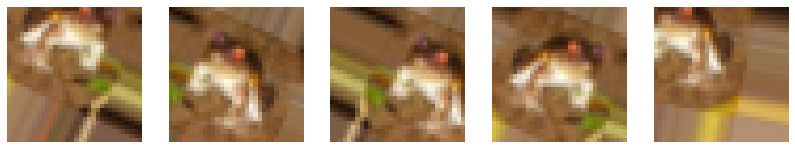

In [29]:
plt.figure(figsize=(14,14))
gen = datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()